In [1]:
import os
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import math as m

# Check if all dependencies are met for statsmodels module: https://www.statsmodels.org/stable/install.html#pypi-pip
#global variables
scope = [("D",365), ("W", 52), ("M",12), ("Q",4), ("Y",1)]
resample, period = scope[1]  # Day: 1, Week: 2, Month: 3, Quartile: 4, Year: 1

In [5]:
# list of csv files containing hourly measurements of a single station
filenames = ["NL10131_2012_2021.csv", "NL10444_2012_2021.csv", "NL10538_2012_2021.csv", 
             "NL10633_2012_2021.csv", "NL10738_2012_2021.csv", "NL10929_2012_2021.csv"]
substances = ["NH3"]

stations = []
for file  in filenames: 
    path = 'normalized'
    df = pd.read_csv(f"{path}/{file}")

    df["Datetime"] = pd.to_datetime(df["Datetime"])

    # resample data to daily frequency and calculate median values. 
    # interpolate missing values instead of filling [fillna(0)] or dropping rows [dropna()]
    # H, D, W, M, Q, Y,
    df.set_index('Datetime', inplace=True)
    resampled_medians = df.resample(resample).median(numeric_only=True).interpolate()


    for substance in substances:
        #object containing decomposed time-series into weekly subsets
        sd = seasonal_decompose(resampled_medians[substance], model='additive', period=period) # Change to desired column
        stations.append((file, substance, sd))


Display the data in plots

saved file as: NL10444_NH3_W_52_normalized.png


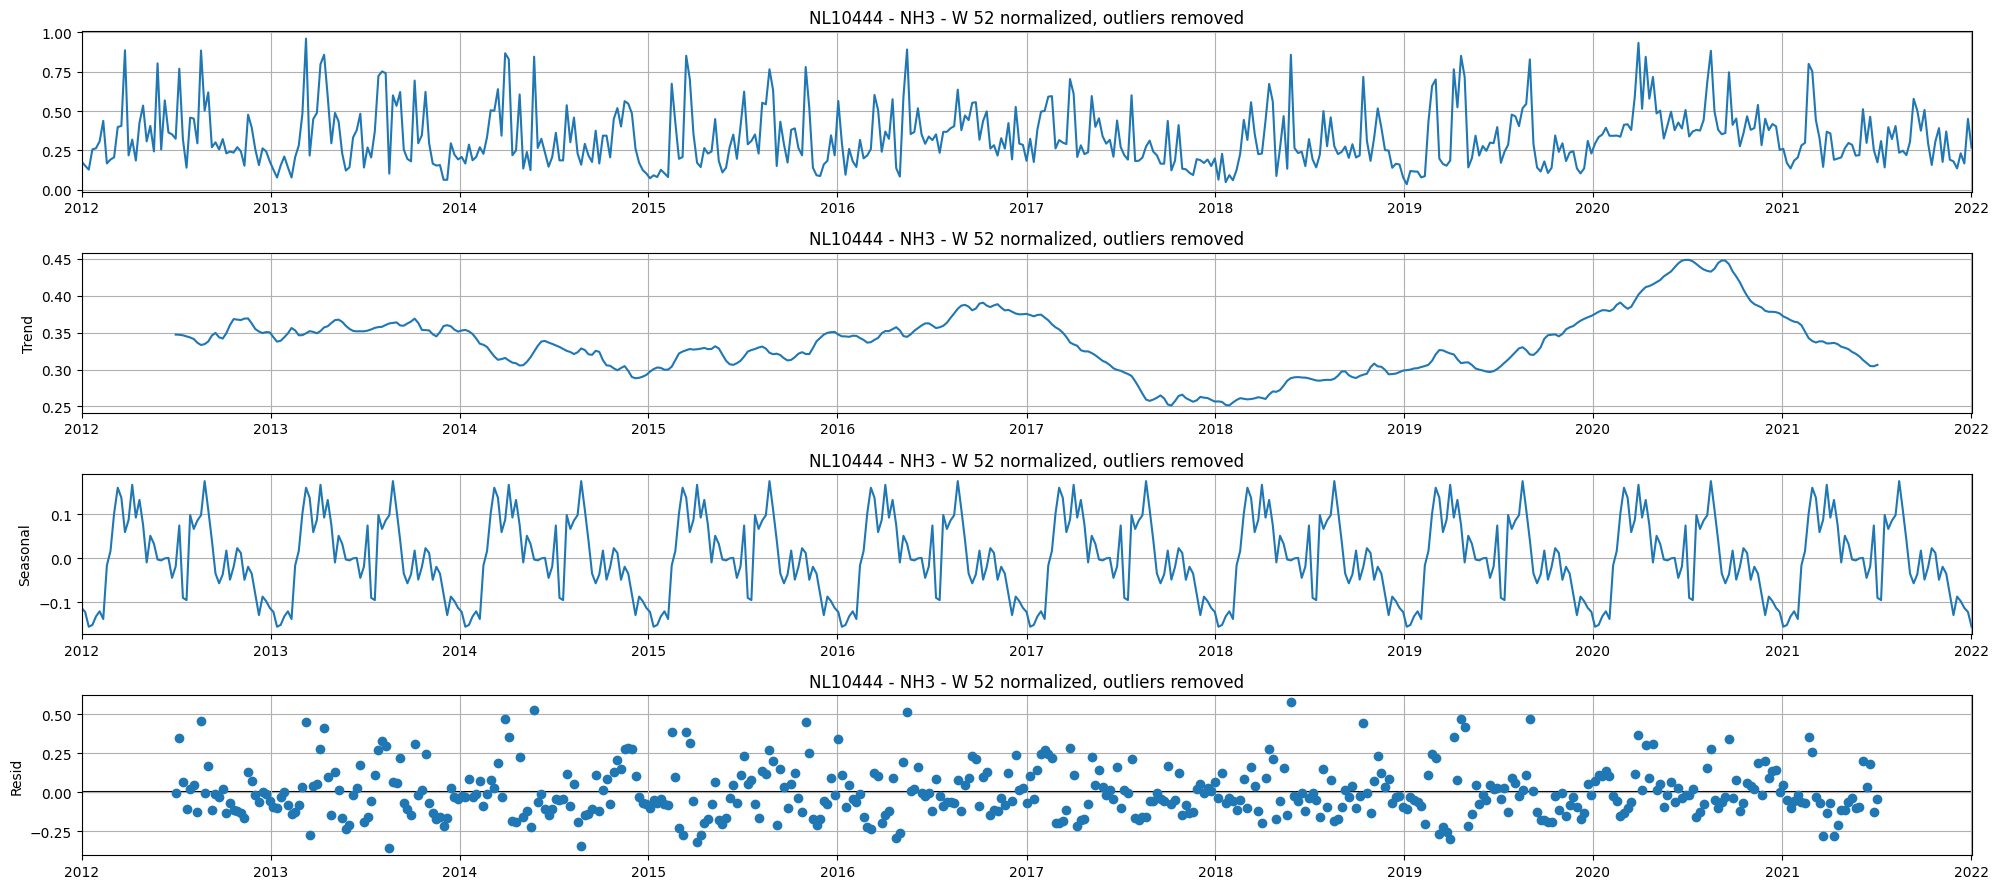

In [8]:
#trial plot
filename, column, sd = stations[1] # change index to go to the next series
fig = sd.plot()
fig.set_size_inches((20,9))
fig.subplots_adjust(top=1.2)
filename = filename[:file.index("_")] # String slice up to first "_"
for ax in fig.axes:
    ax.grid()
    ax.set_title(f"{filename} - {column} - {resample} {period} normalized, outliers removed")
fig.tight_layout()
plt.savefig(f"graphs/{filename}_{column}_{resample}_{period}_normalized.png", dpi=300)
print("saved file as:",f"{filename}_{column}_{resample}_{period}_normalized.png")
plt.show()

In [9]:
for filename, column, sd in stations:
    fig = sd.plot()
    fig.set_size_inches((20,9))
    fig.subplots_adjust(top=1.2)
    filename = filename[:filename.index("_")] # String slice up to first "_"
    for ax in fig.axes:
        ax.grid()
        ax.set_title(f"{filename} - {column} - {resample} {period}")
    fig.tight_layout()
    plt.savefig(f"graphs/{filename}_{column}_{resample}_{period}.png", dpi=300)
    print("saved file as:",f"{filename}_{column}_{resample}_{period}.png")
    plt.close(fig) #save memory & time by not displaying the plots in the notebook

saved file as: NL10131_NH3_W_52.png
saved file as: NL10444_NH3_W_52.png
saved file as: NL10538_NH3_W_52.png
saved file as: NL10633_NH3_W_52.png
saved file as: NL10738_NH3_W_52.png
saved file as: NL10929_NH3_W_52.png


In [14]:
print(stations)

[('NL10131_2012_2021.csv', 'NH3_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6BDEEF0>), ('NL10131_2012_2021.csv', 'NO2_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6BDC1C0>), ('NL10131_2012_2021.csv', 'PM10_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6BDD0F0>), ('NL10444_2012_2021.csv', 'NH3_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6BDDC00>), ('NL10444_2012_2021.csv', 'NO2_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6665B70>), ('NL10444_2012_2021.csv', 'PM10_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B66664D0>), ('NL10538_2012_2021.csv', 'NH3_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B66664A0>), ('NL10538_2012_2021.csv', 'NO2_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B65FB100>), ('NL10538_2012_2021.csv', 'PM10_rs', <statsmodels.tsa.seasonal.DecomposeResult object at 0x00000237B6C10D30>), ('NL10